In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import linalg
from scipy import optimize
import scipy
import os
import dynamic
import tools
import importlib
importlib.reload(dynamic)
import shutil

In [17]:
paras=[[0.01,0,1,1.5],[0.01,0,2,1.5],[0.01,0,2,-1.5],[0.01,2,1,0.2],[0.01,2,1,0.55],[0.01,2,1,1.5]]
for para in paras:
    alpha,c,d,gamma=para
    color = plt.get_cmap("Blues")
    N = 4000
    diluted = 1
    segment=1
    clean_diag=False
    gaussian=False
    if_circulant = True
    tau = 0.01
    phi = lambda x: np.tanh(x)
    all_overlap =[]
    print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))
    if not os.path.exists("data/Fig1/overlap_{}_{}_{}_{}.csv".format(alpha,c,d,gamma)):
#         shutil.copyfile("../data/retrieval_type/overlap_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),"data/Fig1/overlap_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
        
        for i in range(30):
            print(i)
            mpara = dynamic.modelpara(N=N,alpha=alpha,c=c,d=d,gamma=gamma,if_circulant=if_circulant,phi=phi,tau=tau,diluted=diluted,segment=segment,clean_diag=clean_diag,gaussian=gaussian)
            mymodel = dynamic.rnn(mpara)
            mymodel.simulate(1.5,mymodel.pattern[0],dt=0.01)
            overlap_activation = mymodel.overlap_activation()
            all_overlap.append(overlap_activation)
        mean = np.average(np.array(all_overlap),axis=0)

        for pattern_index in range(int(N*alpha)):
            if pattern_index==0:
                plt.plot(mymodel.t,mean[pattern_index],color="r")
            else:
                plt.plot(mymodel.t,mean[pattern_index],color=color(pattern_index/int(N*alpha)))
        np.savetxt("data/Fig1/overlap_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),mean)

alpha=0.01,c=0,d=1,gamma=1.5
alpha=0.01,c=0,d=2,gamma=1.5
alpha=0.01,c=0,d=2,gamma=-1.5
alpha=0.01,c=2,d=1,gamma=0.2
alpha=0.01,c=2,d=1,gamma=0.55
alpha=0.01,c=2,d=1,gamma=1.5


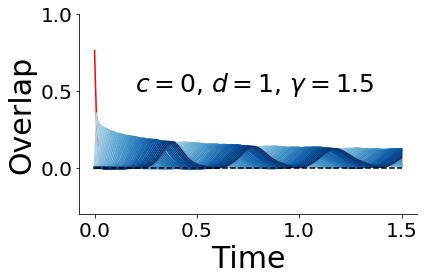

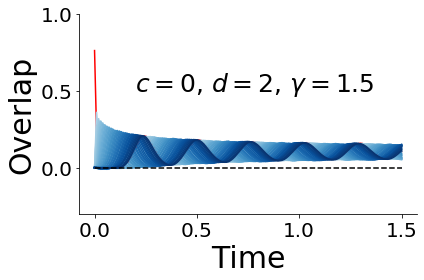

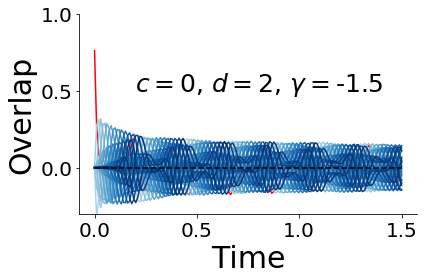

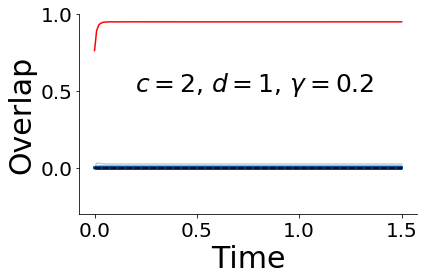

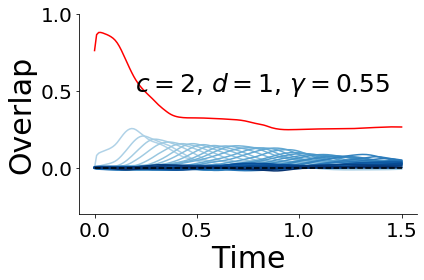

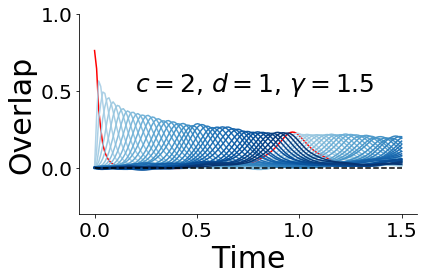

In [14]:
paras=[[0.01,0,1,1.5],[0.01,0,2,1.5],[0.01,0,2,-1.5],[0.01,2,1,0.2],[0.01,2,1,0.55],[0.01,2,1,1.5]]
color = plt.get_cmap("Blues")
tt=np.linspace(0,1.5,num=150)
for para in paras:
    alpha,c,d,gamma = para
    if os.path.exists("data/Fig1/overlap_{}_{}_{}_{}.csv".format(alpha,c,d,gamma)):
        plt.clf()
        mean = np.loadtxt("data/Fig1/overlap_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
        for pattern_index in range(int(N*alpha)):
            if pattern_index==0:
                plt.plot(tt,mean[pattern_index],color="r")
            else:
                plt.plot(tt,mean[pattern_index],color=color(0.3+0.7*pattern_index/int(N*alpha)))
        plt.plot(tt,np.zeros_like(tt),linestyle="--",color="k")
        plt.ylim(-0.3,1)
        plt.xlabel("Time",fontsize=30)
        plt.ylabel("Overlap",fontsize=30)
        plt.xticks([0.0,0.5,1.0,1.5],fontsize=20)
        plt.yticks([0.0,0.5,1.0],fontsize=20)
        ax =plt.gca()
        ax.spines["right"].set_color("none")
        ax.spines["top"].set_color("none")
        plt.text(s=r"$c=${}, $d=${}, $\gamma=${}".format(c,d,gamma),x=0.2,y=0.5,fontsize=25)
        plt.tight_layout()
        plt.savefig("figure/Fig1/overlap_{}_{}_{}_{}.pdf".format(alpha,c,d,gamma))
        plt.show()